### Import your librares

In [87]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt
import plotly as px 

### Load your dataset

In [88]:
DF = pd.read_csv('seattle_weather.csv')
DF.isnull().sum()
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


### Handle missing data in PRCP and RAIN columns

In [89]:
DF.var()

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_20529/333493564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DF.var()


PRCP      0.057136
TMAX    163.149112
TMIN     79.082528
RAIN      0.244629
dtype: float64

In [90]:
DF[DF['RAIN'].isnull()]
# DF[DF['DATE']=='1998-06-02']

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [91]:
DF[DF['RAIN'].isnull()]
# DF[DF['TMAX']==72 & DF['TMIN']==52]
# DF[DF['TMAX']==72]
DF.query('TMAX == 72 and TMIN ==52')
DF.query('TMAX == 66 and TMIN ==51')
DF.query('TMAX == 70 and TMIN ==52')

,DATE,PRCP,TMAX,TMIN,RAIN
570,1949-07-24,0.05,70,52,True
1699,1952-08-26,0.00,70,52,False
2362,1954-06-20,0.06,70,52,True
2441,1954-09-07,0.14,70,52,True
2694,1955-05-18,0.00,70,52,False
4190,1959-06-22,0.00,70,52,False
4197,1959-06-29,0.00,70,52,False
5304,1962-07-10,0.00,70,52,False
5363,1962-09-07,0.00,70,52,False
6110,1964-09-23,0.00,70,52,False


In [92]:
DF.RAIN.bfill(
    inplace=True)
DF.PRCP.bfill(
    inplace=True)
DF.isnull().sum()


DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [93]:
DF.var()

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_20529/333493564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DF.var()


PRCP      0.057131
TMAX    163.149112
TMIN     79.082528
RAIN      0.244622
dtype: float64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


In [94]:
DF.describe()


,PRCP,TMAX,TMIN
count,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226
std,0.239020,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


<AxesSubplot:>

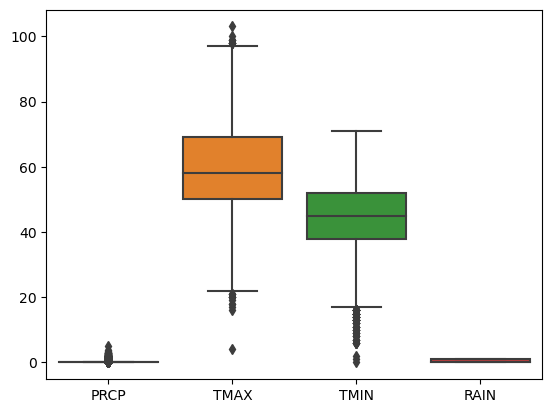

In [95]:
sns.boxplot(data=DF)

In [96]:
def findOutliers(colume):
    Q1 = np.percentile(DF['{}'.format(colume)], 25, interpolation = 'midpoint')
    Q3 = np.percentile(DF['{}'.format(colume)], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    higher_bound = Q3 + 1.5*(IQR)    
    lower_bound = Q1 - 1.5*(IQR)
    print('lower bound outliers ', Q1 - 1.5*(IQR))
    print('higher bound outliers', Q3 + 1.5*(IQR))
    return higher_bound ,lower_bound

In [97]:
def drop_outliers(max,min,name,DF):

    DF = DF.drop(DF[(DF['{}'.format(name)] > max) | (DF['{}'.format(name)] < min)].index)
    return DF

In [98]:
TMAX_High,TMAX_Min = findOutliers('TMAX')
DF = drop_outliers(TMAX_High,TMAX_Min,'TMAX',DF)
TMIN_High,TMIN_Min =  findOutliers('TMIN')
DF = drop_outliers(TMIN_High,TMIN_Min,'TMIN',DF)
PRCP_High,PRCP_Min=findOutliers('PRCP')
DF = drop_outliers(PRCP_High,PRCP_Min,'PRCP',DF)


lower bound outliers  21.5
higher bound outliers 97.5
lower bound outliers  17.0
higher bound outliers 73.0
lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


<AxesSubplot:>

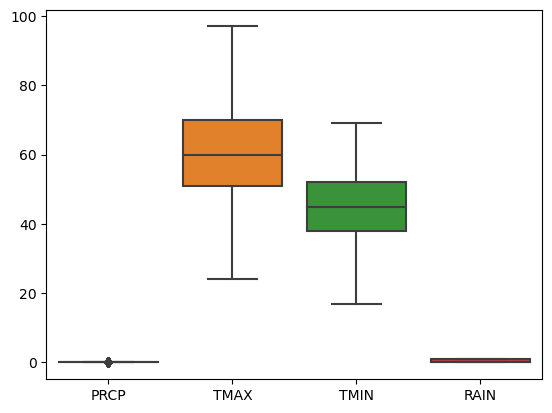

In [99]:
sns.boxplot(data=DF)

In [100]:
DF.describe()

,PRCP,TMAX,TMIN
count,21893.000000,21893.000000,21893.000000
mean,0.030573,60.776413,44.877175
std,0.059261,12.925012,8.937760
min,0.000000,24.000000,17.000000
25%,0.000000,51.000000,38.000000
50%,0.000000,60.000000,45.000000
75%,0.030000,70.000000,52.000000
max,0.250000,97.000000,69.000000


In [101]:
DF.var()

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_20529/333493564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DF.var()


PRCP      0.003512
TMAX    167.055935
TMIN     79.883552
RAIN      0.222632
dtype: float64